In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [101]:

df_2018 = pd.read_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\clean\c_data_18.csv')

df_2019 = pd.read_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\clean\c_data_19.csv')

df_2020 = pd.read_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\clean\c_data_20.csv')

df_2021 = pd.read_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\clean\c_data_21.csv')

df_2022 = pd.read_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\clean\c_data_22.csv')


In [102]:
import pandas as pd

# Load each dataset


# Concatenate all datasets
combined_df = pd.concat([df_2018, df_2019, df_2020, df_2021, df_2022])

# Convert 'Sail Date.' to datetime
combined_df['Sail Date.'] = pd.to_datetime(combined_df['Sail Date.'])

# Extract month and day from the "Sail Date.'Sail Date.'" column
combined_df['Month_Day'] = combined_df['Sail Date.'].dt.strftime('%m-%d')

# Pivot the combined dataset
pivot_df = combined_df.pivot_table(index='Month_Day', columns=combined_df['Sail Date.'].dt.year, values='QTY.(KGS)', aggfunc='sum')

# Replace missing values in the "2018" column with mean of non-missing values in 2018


# Reset index to get "Month_Day" as a column
pivot_df.reset_index(inplace=True)

# Rename columns
pivot_df.columns.name = None

# Print or save the pivot_df as per your requirement
print(pivot_df)


    Month_Day       2018       2019       2020       2021       2022
0       01-01   337485.0   686993.0  1284272.0  1244317.0  1285112.0
1       01-02        NaN  1920106.0        NaN  1499299.0   805926.0
2       01-03        NaN  1598395.0        NaN  1115398.0        NaN
3       01-04   697207.0  1621244.0   110652.0   213313.0  2054215.0
4       01-05  1464201.0   148152.0        NaN  1020265.0        NaN
..        ...        ...        ...        ...        ...        ...
361     12-27   125924.0   643626.0        NaN  2648166.0  1669346.0
362     12-28  2477337.0        NaN  3430383.0        NaN  1113987.0
363     12-29        NaN   392141.0        NaN   966369.0   278274.0
364     12-30        NaN  1054901.0   134188.0   178873.0   416466.0
365     12-31   903441.0  1088381.0        NaN        NaN  1218553.0

[366 rows x 6 columns]


In [103]:
pivot_df.to_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\Code\concat\join.csv', index=False)

In [104]:


print(list(pivot_df.columns))


['Month_Day', 2018, 2019, 2020, 2021, 2022]


In [105]:
pivot_df[ 2018].fillna(pivot_df[ 2018].mean(), inplace=True)

pivot_df[ 2019].fillna(pivot_df[ 2019].mean(), inplace=True)

pivot_df[ 2020].fillna(pivot_df[ 2020].mean(), inplace=True)

pivot_df[ 2021].fillna(pivot_df[ 2021].mean(), inplace=True)

pivot_df[ 2022].fillna(pivot_df[ 2022].mean(), inplace=True)


C:\Users\augus\AppData\Local\Temp\ipykernel_28528\3421611582.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pivot_df[ 2018].fillna(pivot_df[ 2018].mean(), inplace=True)
C:\Users\augus\AppData\Local\Temp\ipykernel_28528\3421611582.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [106]:
pivot_df

,Month_Day,2018,2019,2020,2021,2022
0,01-01,3.374850e+05,6.869930e+05,1.284272e+06,1.244317e+06,1.285112e+06
1,01-02,1.030556e+06,1.920106e+06,9.854102e+05,1.499299e+06,8.059260e+05
2,01-03,1.030556e+06,1.598395e+06,9.854102e+05,1.115398e+06,1.198180e+06
3,01-04,6.972070e+05,1.621244e+06,1.106520e+05,2.133130e+05,2.054215e+06
4,01-05,1.464201e+06,1.481520e+05,9.854102e+05,1.020265e+06,1.198180e+06
...,...,...,...,...,...,...
361,12-27,1.259240e+05,6.436260e+05,9.854102e+05,2.648166e+06,1.669346e+06
362,12-28,2.477337e+06,9.959675e+05,3.430383e+06,1.001102e+06,1.113987e+06
363,12-29,1.030556e+06,3.921410e+05,9.854102e+05,9.663690e+05,2.782740e+05
364,12-30,1.030556e+06,1.054901e+06,1.341880e+05,1.788730e+05,4.164660e+05


In [107]:
# Assuming pivot_df is your DataFrame with the "2018" column containing exponential values
pivot_df[2018] = pivot_df[2018].apply(lambda x: '{:.0f}'.format(x) if isinstance(x, float) else x)
pivot_df[2019] = pivot_df[2019].apply(lambda x: '{:.0f}'.format(x) if isinstance(x, float) else x)
pivot_df[2020] = pivot_df[2020].apply(lambda x: '{:.0f}'.format(x) if isinstance(x, float) else x)
pivot_df[2021] = pivot_df[2021].apply(lambda x: '{:.0f}'.format(x) if isinstance(x, float) else x)
pivot_df[2022] = pivot_df[2022].apply(lambda x: '{:.0f}'.format(x) if isinstance(x, float) else x)






print(pivot_df)



    Month_Day     2018     2019     2020     2021     2022
0       01-01   337485   686993  1284272  1244317  1285112
1       01-02  1030556  1920106   985410  1499299   805926
2       01-03  1030556  1598395   985410  1115398  1198180
3       01-04   697207  1621244   110652   213313  2054215
4       01-05  1464201   148152   985410  1020265  1198180
..        ...      ...      ...      ...      ...      ...
361     12-27   125924   643626   985410  2648166  1669346
362     12-28  2477337   995967  3430383  1001102  1113987
363     12-29  1030556   392141   985410   966369   278274
364     12-30  1030556  1054901   134188   178873   416466
365     12-31   903441  1088381   985410  1001102  1218553

[366 rows x 6 columns]


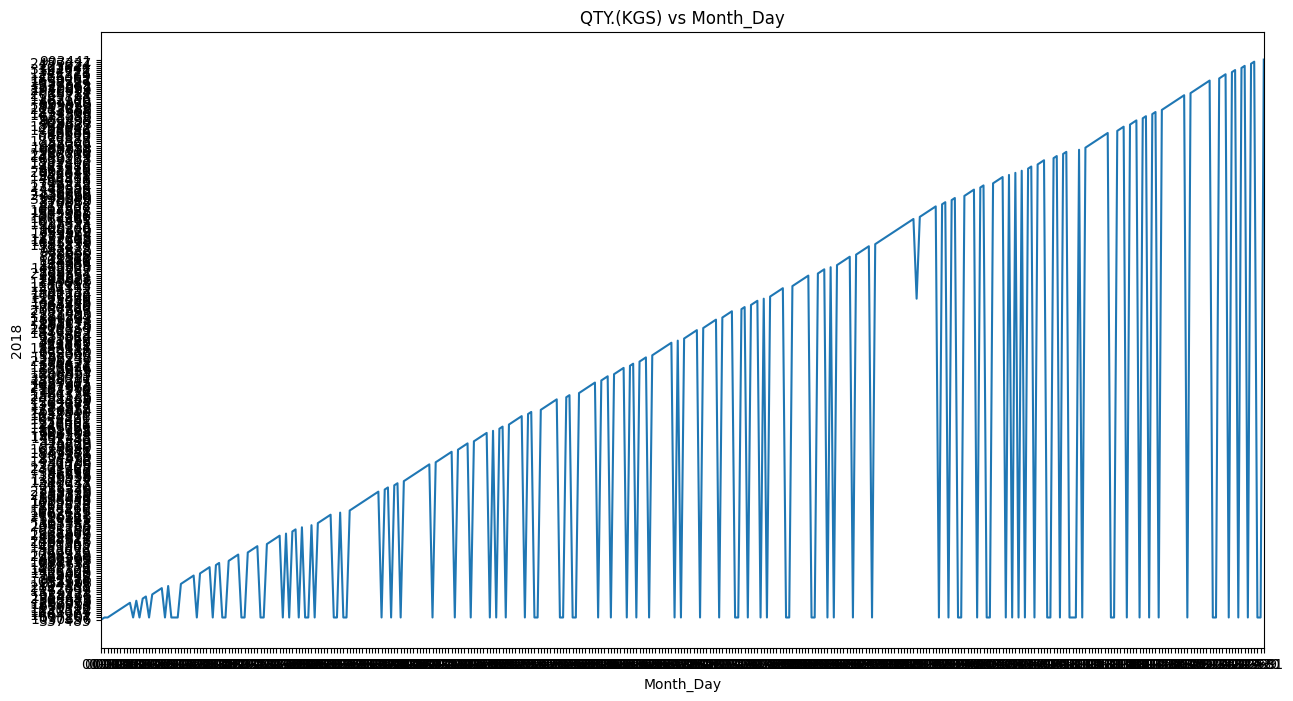

In [122]:

plt.figure(figsize=(15,8))
plt.plot(pivot_df['Month_Day'], pivot_df[2018])
plt.xlabel('Month_Day')
plt.ylabel('2018')
plt.title('QTY.(KGS) vs Month_Day')
plt.xlim(pivot_df['Month_Day'].min(), pivot_df['Month_Day'].max())
plt.show()

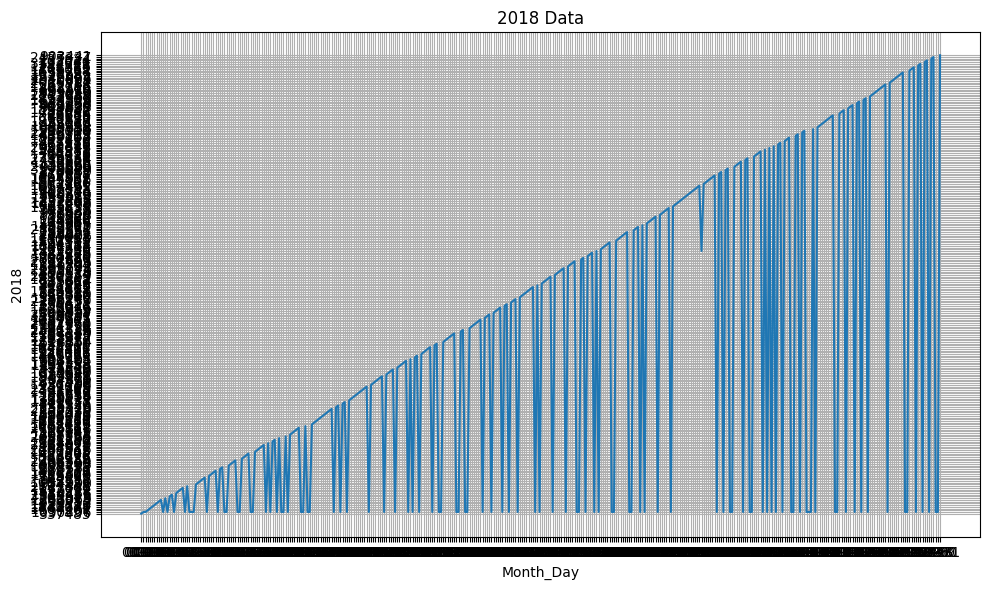

In [127]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(pivot_df['Month_Day'], pivot_df[2018], marker='', linestyle='-')
plt.xlabel('Month_Day')
plt.ylabel('2018')
plt.title('2018 Data')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
pivot_df.to_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\Code\concat\join.csv', index=False)

In [109]:
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LinearRegression



# X_train = pivot_df[['Month_Day']]
# y_train = pivot_df.drop(columns=['Month_Day'])

# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X_train = ct.fit_transform(X_train)


# model = LinearRegression()
# model.fit(X_train, y_train)


# dates_2023 = ['01-01', '01-02', '01-03', '01-04', '01-05', '12-27', '12-28', '12-29', '12-30', '12-31']
# X_test = pd.DataFrame({'Month_Day': dates_2023})
# X_test = ct.transform(X_test)


# predictions_2023 = model.predict(X_test)


# predictions_df = pd.DataFrame(predictions_2023, columns=[str(year) for year in range(2023, 2028)])
# predictions_df.insert(0, 'Month_Day', dates_2023)
# predictions_df.to_csv('final.csv', index=False)


In [110]:
# import pandas as pd
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.linear_model import LinearRegression



# # Prepare the training data
# X_train = pivot_df[['Month_Day']]
# y_train = pivot_df(columns=['Month_Day'])

# # One-hot encode the Month_Day column
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X_train = ct.fit_transform(X_train)

# # Train a regression model
# model = LinearRegression()
# model.fit(X_train, y_train)

# # Generate all dates in 2023
# dates_2023 = pd.date_range(start='2023-01-01', end='2023-12-31').strftime('%m-%d')

# # Prepare data for predicting 2023
# X_test = pd.DataFrame({'Month_Day': dates_2023})
# X_test = ct.transform(X_test)

# # Predict for 2023
# predictions_2023 = model.predict(X_test)

# # Save predictions to final.csv
# predictions_df = pd.DataFrame(predictions_2023, columns=[str(year) for year in range(2023, 2028)])
# predictions_df.insert(0, 'Month_Day', dates_2023)
# predictions_df.to_csv('final.csv', index=False)


In [113]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Load your dataset and pivot it if needed
# Assuming you already have the 'pivot_df' DataFrame loaded

# Prepare the training data
X_train = pivot_df[['Month_Day']]
y_train = pivot_df[[2018, 2019, 2020, 2021, 2022]]  # Corrected column access

# One-hot encode the Month_Day column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_train_encoded = ct.fit_transform(X_train)

# Train a regression model
model = LinearRegression()
model.fit(X_train_encoded, y_train)

# Generate all dates for the year 2023
dates_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
dates_2023_formatted = dates_2023.strftime('%m-%d')

# Prepare data for predicting 2023
X_test = pd.DataFrame({'Month_Day': dates_2023_formatted})
X_test_encoded = ct.transform(X_test)

# Predict for 2023
predictions_2023 = model.predict(X_test_encoded)

# Save predictions to final.csv
predictions_df = pd.DataFrame(predictions_2023, columns=[str(year) for year in range(2023, 2028)])
predictions_df.insert(0, 'Month_Day', dates_2023_formatted)
predictions_df.to_csv('final.csv', index=False)
